(1521, 44) (1521, 18) (1521, 26)


IndexError: index 19 is out of bounds for axis 1 with size 19

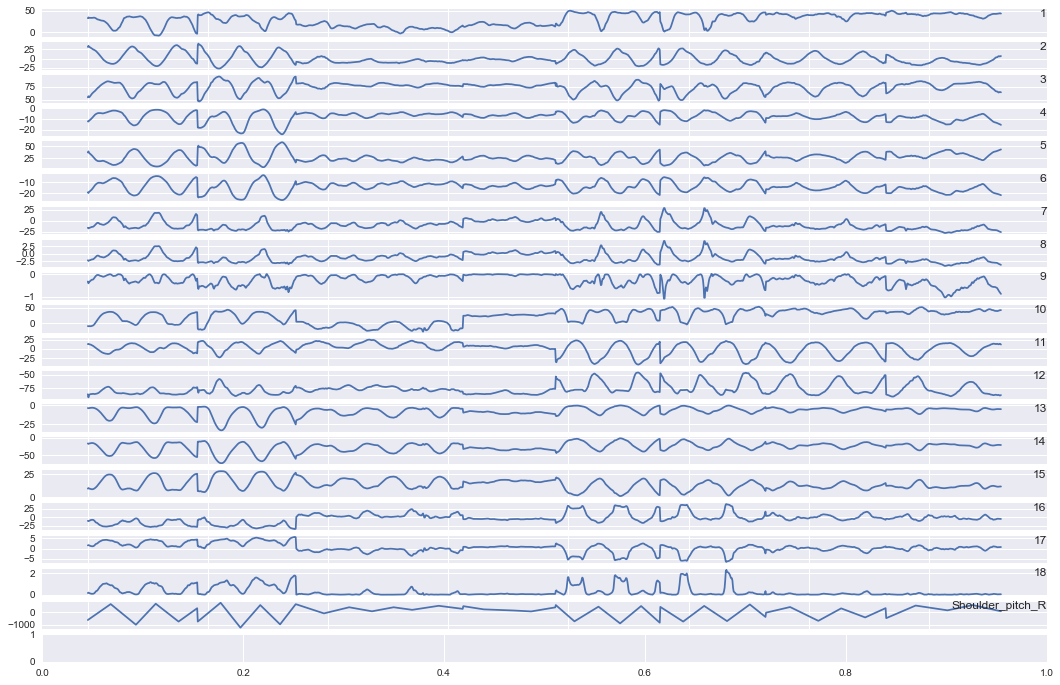

In [533]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs


'''cap = pd.read_csv("/Users/houzhuo/Downloads/capdata3.csv")
robot    = pd.read_csv("/Users/houzhuo/Downloads/robot.csv")
full = pd.concat([cap,robot],axis=1)
dataset = pd.concat([full['22'],full['23'],full['24'],full['25'],full['26'],full['27'],full['28'],full['29'],full['30'],
                    full['49'],full['50'],full['51'],full['52'],full['53'],full['54'],full['55'],full['56'],full['57'],
                     full['Shoulder_pitch_R'] ] , axis=1 )
dataset.head()'''


f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
cap = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()
dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],
                     full['10'],full['11'],full['12'],full['13'],full['14'],full['15'],full['16'],full['17'],full['18']
    ,full['Shoulder_pitch_R'] ] , axis=1 )

values = dataset.values
groups = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

dataset.describe()

In [543]:
#for end in np.linspace(0, 1250, num=bins):  

for end in np.linspace(0, 1250, num=10):
    print(end)
df_range = dataset[(np.absolute(dataset['Shoulder_pitch_R']) >= 0) & (np.absolute(dataset['Shoulder_pitch_R']) < 125)]
df_range

0.0
138.88888888888889
277.77777777777777
416.66666666666663
555.5555555555555
694.4444444444445
833.3333333333333
972.2222222222222
1111.111111111111
1250.0


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Shoulder_pitch_R
16,29.3710,15.95400,71.851,-4.8023,19.784,-11.0480,-4.88210,-0.687880,-0.030137,10.35800,-0.95056,-85.260,-5.9112,-22.856,12.6420,-17.75400,2.578700,0.401600,-102.157895
17,29.0930,14.20800,72.759,-4.6547,19.350,-10.8200,-4.88060,-0.687690,-0.029781,13.16400,-1.88870,-84.820,-6.5497,-24.529,13.4880,-19.45800,2.845400,0.486340,-69.105263
18,28.7550,12.34000,73.749,-4.5739,19.110,-10.6940,-5.33650,-0.752150,-0.034693,15.89300,-2.98940,-84.179,-7.2334,-26.243,14.3420,-21.04700,3.100100,0.576240,-36.052632
19,28.2020,10.32400,74.903,-4.5690,19.096,-10.6870,-6.38570,-0.901070,-0.048944,18.50300,-4.41010,-83.225,-7.9429,-27.955,15.1760,-22.37000,3.315800,0.655710,-3.000000
20,27.6480,8.26750,76.031,-4.5970,19.178,-10.7300,-7.38020,-1.043100,-0.067274,20.94900,-5.82770,-82.158,-8.7056,-29.714,16.0200,-23.49200,3.502200,0.728430,30.052632
21,27.1580,6.21750,77.056,-4.6190,19.244,-10.7650,-7.70510,-1.089600,-0.073685,23.18600,-7.01440,-81.155,-9.5208,-31.534,16.8700,-24.29300,3.637200,0.783710,63.105263
22,26.7570,4.17840,78.009,-4.6617,19.369,-10.8310,-7.86580,-1.112500,-0.076234,25.21900,-8.09720,-80.173,-10.3970,-33.417,17.7280,-24.96200,3.751100,0.830680,96.157895
51,9.0386,-6.29180,82.516,-2.9826,13.999,-7.9444,0.13295,0.018678,0.002197,22.68300,-2.23750,-85.003,-6.5624,-24.558,13.5040,-18.31400,2.666400,0.430200,120.166667
52,10.1730,-4.73100,82.502,-3.1614,14.619,-8.2830,-0.67716,-0.095173,0.000708,20.04900,-1.84600,-85.032,-5.5862,-21.998,12.1960,-16.44100,2.375900,0.340070,81.333333
53,11.3120,-3.08370,82.400,-3.3560,15.278,-8.6420,-1.18180,-0.166130,-0.001133,17.17700,-1.25140,-85.042,-4.7837,-19.709,11.0130,-14.40300,2.068000,0.259880,42.500000


In [545]:

balanced = pd.DataFrame()   # Balanced dataset
bins =   10               # N of bins
bin_n = 50                 # N of examples to include in each bin (at most)

start = 0
for end in np.linspace(125, 1250, num=bins):
    print(end)
    df_range = dataset[(np.absolute(dataset['Shoulder_pitch_R']) >= start) & (np.absolute(dataset['Shoulder_pitch_R']) < end)]
    print(df_range.shape[0])
    range_n = min(bin_n, df_range.shape[0])
    balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end
balanced

125.0
301
250.0
384
375.0
364
500.0
237
625.0
119
750.0
64
875.0
28
1000.0
15
1125.0
5
1250.0
4


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Shoulder_pitch_R
180,42.5600,2.747400,73.825,-8.3205,28.832,-15.6000,-12.94700,-1.851600,-0.210120,36.17100,3.05570,-80.071,-4.99000,-20.3220,11.3310,-0.74036,0.10406,0.000098,-104.857143
138,30.2680,-4.945900,77.603,-4.4666,18.779,-10.5220,-3.72810,-0.524520,-0.016191,47.70600,-11.05800,-73.112,-7.99730,-28.0780,15.2370,-6.97670,0.98543,0.065255,54.625000
62,37.5640,-0.060507,73.482,-7.2086,26.183,-14.3110,-13.05300,-1.867300,-0.213650,46.81700,-0.92240,-79.445,-5.75160,-22.4360,12.4260,-1.84310,0.25912,0.000989,-117.680851
47,25.4750,4.584700,71.478,-9.3855,31.235,-16.7320,-16.94200,-2.453600,-0.365330,-15.88600,16.69800,-76.513,-6.16140,-23.5280,12.9820,4.24540,-0.59777,0.022375,-97.500000
18,28.7550,12.340000,73.749,-4.5739,19.110,-10.6940,-5.33650,-0.752150,-0.034693,15.89300,-2.98940,-84.179,-7.23340,-26.2430,14.3420,-21.04700,3.10010,0.576240,-36.052632
87,24.5440,-11.998000,78.944,-3.8130,16.777,-9.4506,-7.62170,-1.078100,-0.081709,43.40900,-12.61900,-72.451,-8.49110,-29.2380,15.7900,-5.18670,0.73102,0.033796,38.631579
127,47.9660,-5.245300,77.795,-7.6417,27.234,-14.8270,-17.20000,-2.493500,-0.377330,40.99500,-18.83800,-66.429,-5.16110,-20.8140,11.5860,-1.63310,0.22946,0.006800,-116.571429
61,44.1380,-3.554700,76.900,-6.8472,25.277,-13.8640,-7.14630,-1.009500,-0.061550,47.62800,-21.77100,-61.902,-6.45990,-24.2940,13.3710,-3.09830,0.43579,0.010437,56.228571
11,40.8870,4.437900,71.698,-7.3612,26.556,-14.4950,-11.43500,-1.628900,-0.163420,21.12800,5.74460,-82.305,-2.68650,-12.9410,7.3631,13.37600,-1.91510,0.224560,71.100000
62,42.9810,-5.262600,78.250,-6.4235,24.206,-13.3260,-5.75220,-0.811120,-0.040224,48.36800,-25.25500,-58.434,-6.85240,-25.2960,13.8720,-4.32640,0.60918,0.022619,91.542857


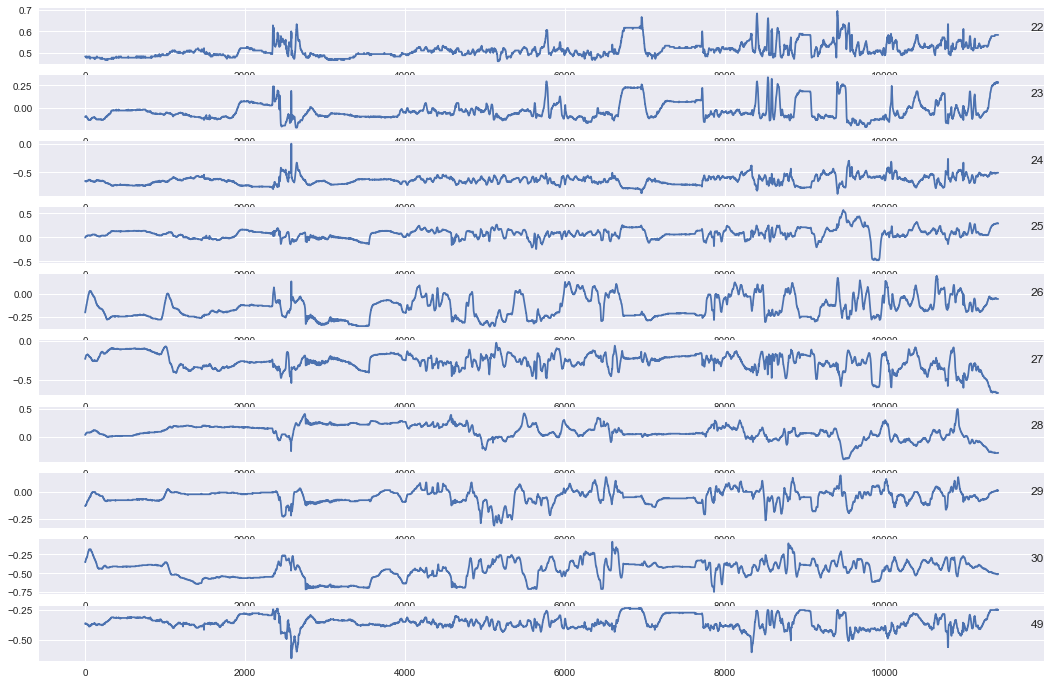

array([-0.00555556,  0.        ,  0.        , ...,  0.28888889,
        0.28888889,  0.28888889])

In [503]:
values = dataset.values

n_features=18
for i in range(n_features):
    for j in range(len(values[:,i])):
        values[:,i][j] =int(values[:,i][j])/180


for j in range(len(values[:,-1])):
    values[:,-1][j] =int(values[:,-1][j])/5600
        
groups = [0, 1, 2, 3,4,5,6,7,8,9]
i=1
plt.figure(figsize=(18,12))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()
values[:,3]

data delete before size is : (1200, 7)


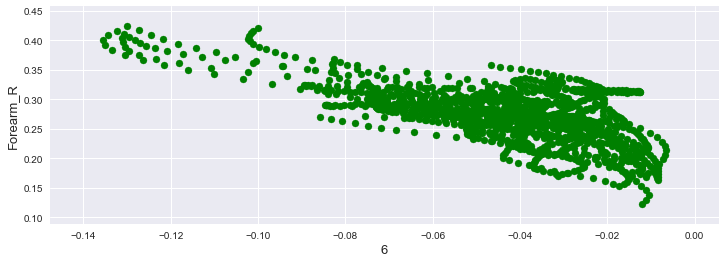

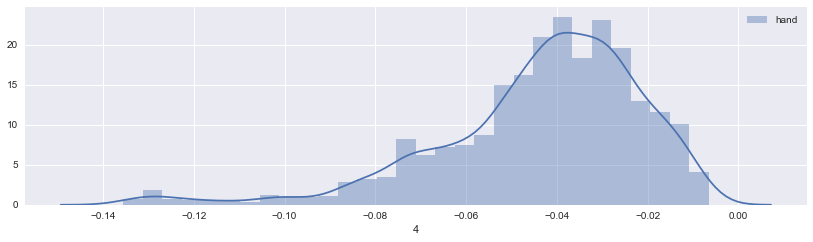

In [119]:
from sklearn import preprocessing 
print("data delete before size is : {}".format(train.shape))
train.shape
#Deleting outliers
#Check the graphic again
#fig, ax = plt.subplots()
#ax.scatter(train['GrLivArea'], train['SalePrice'])

#数据标准化  
#ss_x = preprocessing.StandardScaler()  
#x = ss_x.fit_transform(dataset) 

#print(x.shape)

#plt.figure()
#plt.plot(x[:,2], label = 'predict')
#plt.plot(x[:,6], label = 'true')
#plt.legend()
#plt.show()


balanced = pd.DataFrame()   # Balanced dataset
bins = 1000                 # N of bins
bin_n = 200                 # N of examples to include in each bin (at most)

start = 0
for end in np.linspace(0, 1, num=bins):  
    df_range = df[(df. >= start) & (df.steering < end)]
    range_n = min(bin_n, df_range.shape[0])
    balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end

plt.ylabel('Forearm_R', fontsize=13)
plt.xlabel('6', fontsize=13)
#plt.show()
plt.scatter(x="4", y="Elbow_R", data=dataset,color='green');
#train.shape


plt.figure(figsize=(14,8))
plt.subplot(211)
sns.distplot(dataset['4'],color = 'b')
plt.legend(['hand'])
plt.show()
   

In [504]:


from sklearn import preprocessing
values = dataset.values
print(values.shape)
#values = dataset.astype(np.float32)
n_features=18

train = values[0:10000,:]
test = values[10000:11000,:]

n_obs = n_features
train_X_pre,train_y_pre = train[:,:n_obs],train[:,-1]
test_X_pre,test_y_pre = test[:,:n_obs],test[:,-1]#第一个多少行
print(train_X_pre.shape,train_y_pre.shape)

(11420, 19)
(10000, 18) (10000,)


In [514]:
train_X=[]
train_y=[]
test_y=[]
test_X=[]
time_size = 20
for i in range(500):
    train_X.append(train_X_pre[i*time_size:(i+1)*time_size])
    train_y.append(train_y_pre[i*time_size:(i+1)*time_size])
for i in range(50):
    test_X.append(test_X_pre[i*time_size:(i+1)*time_size])
    test_y.append(test_y_pre[i*time_size:(i+1)*time_size])
np.array(train_y).shape

(500, 20)

In [516]:
train_X = np.array(train_X)
test_X = np.array(test_X)
img_rows = 20
img_cols = 18
train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(train_X.shape)

(500, 20, 18, 1)


In [463]:
np.array(train_y).shape

(200, 50)

Epoch 1/1
50/50 [==============================] - 7s 140ms/step


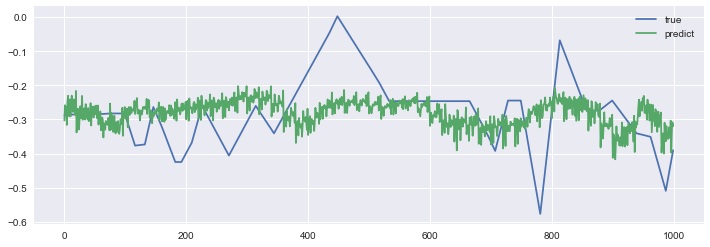

In [518]:
# example of making predictions for a regression problem
from keras.models import Sequential
from sklearn.datasets import make_regression
from keras.layers import LeakyReLU, Dropout
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


'''dropout = 0.4
# define and fit the final model
model = Sequential()
model.add(Dense(16, input_dim=3))
model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(dropout))
          
model.add(Dense(8))
model.add(LeakyReLU(alpha=0.2))
#model.add(Dropout(dropout))
          
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
#model.fit(train_X_pre, train_y_pre, epochs=1000, verbose=1)
'''


def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2),
                     activation='relu',
                 padding="same",
                 input_shape=input_shape))
    #model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    
    #model.add(Conv2D(16, (2, 2), padding="same"))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Conv2D(32, (2, 2), padding="same"))
    #model.add(LeakyReLU(alpha=0.2))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #model.add(Dropout(0.25))
    model.add(Flatten())
    #model.add(Dense(100,activation='relu'))
    #model.add(Dense(40,activation='relu'))
    #model.add(Dense(16,activation = 'linear'))
    model.add(Dense(20,activation = 'linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=1000, batch_size=5, verbose=1)
# use 10-fold cross validation to evaluate this baseline model
#kfold = KFold(n_splits=5, random_state=seed)
#results = cross_val_score(estimator, train_X, np.array(train_y), cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))



'''model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',padding="same",
                 input_shape=input_shape))
model.add(Conv2D(16, (2, 2), padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='linear'))'''

#hist = model.fit(train_X_pre, train_y_pre,batch_size = 20, nb_epoch=500,verbose=1,validation_split=0.2)  
#print(hist.history)  
#score = model.evaluate(train_X_pre, train_y_pre, batch_size=20)

# new instances where we do not know the answer
# make a prediction
#ynew = model.predict(test_X_pre)
# show the inputs and predicted outputs
#for i in range(len(test_X)):
#	print("X=%s, Predicted=%s" % (test_y[i], ynew[i]))
#print(score)

estimator.fit(train_X, np.array(train_y))

ynew = estimator.predict(test_X)
plt.figure()
plt.plot(np.array(test_y).reshape(1000,1), label = 'true')#.reshape(1000,1)
plt.plot(np.array(ynew).reshape(1000,1), label = 'predict')
plt.legend()
plt.show()

Epoch 1/1
100/100 [==============================] - 3s 34ms/step


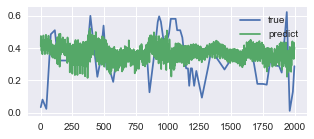

In [277]:
estimator.fit(train_X, np.array(train_y))

ynew = estimator.predict(test_X)
plt.figure(figsize=(5,2))
plt.plot(np.array(test_y).reshape(2000,1), label = 'true')
plt.plot(np.array(ynew).reshape(2000,1), label = 'predict')
plt.legend()
plt.show()

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


In [356]:
df = pd.read_csv('/Users/houzhuo/Downloads/data/02_01/test3.csv')
balanced = pd.DataFrame()   # Balanced dataset
bins = 1000                 # N of bins
bin_n = 200                 # N of examples to include in each bin (at most)

start = 0
for end in np.linspace(0, 1, num=bins):  
    df_range = df[(df['1'] >= start) & (df['1'] < end)]
    print (df_range.shape)
    range_n = min(bin_n, df_range.shape[0])
    print (range_n)
    balanced = pd.concat([balanced, df_range.sample(range_n)])
    start = end

KeyError: '1'

In [389]:
df = pd.read_csv('/Users/houzhuo/Downloads/data/02_01/test3.csv')
balanced = pd.DataFrame()   # Balanced dataset
bins = 1000                 # N of bins
bin_n = 200                 # N of examples to include in each bin (at most)



In [394]:
df_range = df[(df['Hand_R'] >= 2426) & (df['Hand_R'] < 3000)]
print (df_range.shape)
range_n = min(bin_n, df_range.shape[0])
print (range_n)
balanced = pd.concat([balanced, df_range.sample(range_n)])
balanced

(113, 26)
113


,frame,Foot_L,Foot_R,Foot_pitch_L,Hand_L,Foot_pitch_R,Hand_R,Knee_L,Elbow_L,Knee_R,...,Shoulder_L,Hip_R,Shoulder_R,Hip_u_L,Head,Hip_u_R,Head_u,Shoulder_pitch_L,Head_pitch,Shoulder_pitch_R
140,395,0,0,0,-2561.000000,0,2425.000000,0,-1509.736842,0,...,-2247.394737,0,2133.736842,0,0,0,0,-389.210526,0,-347.842105
129,384,0,0,0,-2561.000000,0,2425.000000,0,-1940.473684,0,...,-2233.789474,0,2190.473684,0,0,0,0,-196.421053,0,60.315789
119,374,0,0,0,-2561.000000,0,2425.000000,0,-2332.052632,0,...,-2221.421053,0,2242.052632,0,0,0,0,-21.157895,0,431.368421
117,372,0,0,0,-2561.000000,0,2425.000000,0,-2410.368421,0,...,-2218.947368,0,2252.368421,0,0,0,0,13.894737,0,505.578947
175,430,0,0,0,-2561.000000,0,2425.000000,0,-2201.580645,0,...,-2232.354839,0,2122.677419,0,0,0,0,100.064516,0,59.225806
150,405,0,0,0,-2561.000000,0,2425.000000,0,-1118.157895,0,...,-2259.763158,0,2082.157895,0,0,0,0,-564.473684,0,-718.894737
167,422,0,0,0,-2561.000000,0,2425.000000,0,-1827.387097,0,...,-2241.903226,0,2107.451613,0,0,0,0,-127.290323,0,-212.516129
116,371,0,0,0,-2561.000000,0,2425.000000,0,-2449.526316,0,...,-2217.710526,0,2257.526316,0,0,0,0,31.421053,0,542.684211
156,411,0,0,0,-2561.000000,0,2425.000000,0,-1312.870968,0,...,-2255.032258,0,2086.516129,0,0,0,0,-439.903226,0,-586.161290
174,429,0,0,0,-2561.000000,0,2425.000000,0,-2154.806452,0,...,-2233.548387,0,2120.774194,0,0,0,0,71.645161,0,25.258065


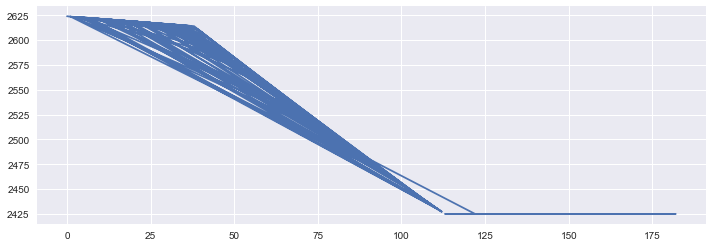

In [395]:
plt.figure()

plt.plot(balanced['Hand_R'])
plt.show()